# Business Understanding

## Project Overview
 Analysis of Vaccination Patterns from the National 2009 H1N1 Flu Survey
 
## Business problem
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.
 
## Project objectives:
## Main Objective  
To analyze the demographic characteristics of respondents, including age, education, income, employment, and household composition.  

## Specific Objectives  
1. **Age Distribution** – Examine the age group distribution among respondents.  
  - **Feature Used:** age_group  

2. **Educational Attainment** – Analyze the levels of education across different respondents.  
  - **Feature Used:** education  

3. **Income and Employment Status** – Assess variations in income levels and employment status.  
  - **Features Used:** income_poverty, employment_status, employment_industry, employment_occupation  

4. **Household Composition** – Investigate household structure based on marital status, homeownership, and number of adults/children.  
  - **Features Used:** marital_status, rent_or_own, household_adults, household_children  

5. **Geographic Demographics** – Identify demographic variations across different regions.  
  - **Features Used:** hhs_geo_region, census_msa  


# Data Understanding 

## Data collection
The data for this competition comes from the National 2009 H1N1 Flu Survey (NHFS).

In their own words:

>The National 2009 H1N1 Flu Survey (NHFS) was sponsored by the National Center for Immunization and Respiratory Diseases (NCIRD) and conducted jointly by NCIRD and the National Center for Health Statistics (NCHS), Centers for Disease Control and Prevention (CDC). The NHFS was a list-assisted random-digit-dialing telephone survey of households, designed to monitor influenza immunization coverage in the 2009-10 season.

The target population for the NHFS was all persons 6 months or older living in the United States at the time of the interview. Data from the NHFS were used to produce timely estimates of vaccination coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines.

The NHFS was conducted between October 2009 and June 2010. It was one-time survey designed specifically to monitor vaccination during the 2009-2010 flu season in response to the 2009 H1N1 pandemic. The CDC has other ongoing programs for annual phone surveys that continue to monitor seasonal flu vaccination.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 

warnings.filterwarnings("ignore")

C:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


**Loading Dataset**

Features for training

In [2]:
# Features Training
train_features_df = pd.read_csv("data/training_set_features.csv")

Features for testing

In [3]:
#Features Test
test_features_df = pd.read_csv("data/test_set_features.csv")

Training Labels

In [4]:
train_labels_df = pd.read_csv("data/training_set_labels.csv")

**training_set_features.csv**

In [5]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## Numerical Columns (26)
- respondent_id  
- h1n1_concern  
- h1n1_knowledge  
- behavioral_antiviral_meds  
- behavioral_avoidance  
- behavioral_face_mask  
- behavioral_wash_hands  
- behavioral_large_gatherings  
- behavioral_outside_home  
- behavioral_touch_face  
- doctor_recc_h1n1  
- doctor_recc_seasonal  
- chronic_med_condition  
- child_under_6_months  
- health_worker  
- health_insurance  
- opinion_h1n1_vacc_effective  
- opinion_h1n1_risk  
- opinion_h1n1_sick_from_vacc  
- opinion_seas_vacc_effective  
- opinion_seas_risk  
- opinion_seas_sick_from_vacc  
- household_adults  
- household_children  

## Categorical Columns (10)
- age_group  
- education  
- race  
- sex  
- income_poverty  
- marital_status  
- rent_or_own  
- employment_status  
- hhs_geo_region  
- census_msa  
- employment_industry  
- employment_occupation  


**Select the feautures**

Features selected are to explore how demographic factors effect 

In [6]:
train_features_df = train_features_df[["respondent_id","age_group", "education", "income_poverty", "employment_status",
    "race", "sex", "marital_status", "rent_or_own","h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds","behavioral_avoidance",
"behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings",
"behavioral_outside_home","behavioral_touch_face","doctor_recc_h1n1","doctor_recc_seasonal",
"chronic_med_condition","child_under_6_months","health_worker",
"health_insurance","opinion_h1n1_vacc_effective","opinion_h1n1_risk",
"opinion_h1n1_sick_from_vacc","opinion_seas_vacc_effective","opinion_seas_risk",
"opinion_seas_sick_from_vacc","household_adults","household_children"]]

In [7]:
train =["age_group", "education", "income_poverty", "employment_status",
    "race", "sex", "marital_status", "rent_or_own","h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds","behavioral_avoidance",
"behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings",
"behavioral_outside_home","behavioral_touch_face","doctor_recc_h1n1","doctor_recc_seasonal",
"chronic_med_condition","child_under_6_months","health_worker",
"health_insurance","opinion_h1n1_vacc_effective","opinion_h1n1_risk",
"opinion_h1n1_sick_from_vacc","opinion_seas_vacc_effective","opinion_seas_risk",
"opinion_seas_sick_from_vacc","household_adults","household_children"]

In [8]:
train_features_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [9]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   age_group                    26707 non-null  object 
 2   education                    25300 non-null  object 
 3   income_poverty               22284 non-null  object 
 4   employment_status            25244 non-null  object 
 5   race                         26707 non-null  object 
 6   sex                          26707 non-null  object 
 7   marital_status               25299 non-null  object 
 8   rent_or_own                  24665 non-null  object 
 9   h1n1_concern                 26615 non-null  float64
 10  h1n1_knowledge               26591 non-null  float64
 11  behavioral_antiviral_meds    26636 non-null  float64
 12  behavioral_avoidance         26499 non-null  float64
 13  behavioral_face_

In [10]:
train_features_df.head()

,respondent_id,age_group,education,income_poverty,employment_status,race,sex,marital_status,rent_or_own,h1n1_concern,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,55 - 64 Years,< 12 Years,Below Poverty,Not in Labor Force,White,Female,Not Married,Own,1.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,35 - 44 Years,12 Years,Below Poverty,Employed,White,Male,Not Married,Rent,3.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed,White,Male,Not Married,Own,1.0,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,65+ Years,12 Years,Below Poverty,Not in Labor Force,White,Female,Not Married,Rent,1.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,45 - 54 Years,Some College,"<= $75,000, Above Poverty",Employed,White,Female,Married,Own,2.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [11]:
train_features_df.tail()

,respondent_id,age_group,education,income_poverty,employment_status,race,sex,marital_status,rent_or_own,h1n1_concern,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
26702,26702,65+ Years,Some College,"<= $75,000, Above Poverty",Not in Labor Force,White,Female,Not Married,Own,2.0,...,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed,White,Male,Not Married,Rent,1.0,...,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,55 - 64 Years,Some College,NaN,NaN,White,Female,Not Married,Own,2.0,...,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,18 - 34 Years,Some College,"<= $75,000, Above Poverty",Employed,Hispanic,Female,Married,Rent,1.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0
26706,26706,65+ Years,Some College,"<= $75,000, Above Poverty",Not in Labor Force,White,Male,Married,Own,0.0,...,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0


In [12]:
train_features_df.sample(5)

,respondent_id,age_group,education,income_poverty,employment_status,race,sex,marital_status,rent_or_own,h1n1_concern,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
3425,3425,18 - 34 Years,Some College,NaN,Not in Labor Force,White,Female,Not Married,Rent,1.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,4.0,2.0,0.0
4496,4496,45 - 54 Years,12 Years,"<= $75,000, Above Poverty",Unemployed,Other or Multiple,Female,Married,Own,3.0,...,0.0,0.0,4.0,2.0,4.0,4.0,2.0,4.0,1.0,0.0
13770,13770,55 - 64 Years,College Graduate,"<= $75,000, Above Poverty",Not in Labor Force,White,Male,Married,Own,2.0,...,0.0,NaN,4.0,1.0,2.0,5.0,2.0,1.0,1.0,0.0
3125,3125,65+ Years,College Graduate,"<= $75,000, Above Poverty",Not in Labor Force,White,Male,Married,Own,2.0,...,0.0,NaN,4.0,2.0,4.0,5.0,4.0,4.0,1.0,0.0
14323,14323,45 - 54 Years,College Graduate,"<= $75,000, Above Poverty",Employed,Hispanic,Male,Married,Own,2.0,...,0.0,NaN,5.0,2.0,4.0,5.0,5.0,1.0,1.0,0.0


**testing_set_features.csv**

In [13]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

**Select the feautures**

Features selected are to explore how demographic factors effect 

In [14]:
test_features_df = test_features_df[["respondent_id","age_group", "education", "income_poverty", "employment_status",
    "race", "sex", "marital_status", "rent_or_own"]]

In [15]:
test_features_df.describe()

,respondent_id
count,26708.000000
mean,40060.500000
std,7710.079831
min,26707.000000
25%,33383.750000
50%,40060.500000
75%,46737.250000
max,53414.000000


In [16]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   respondent_id      26708 non-null  int64 
 1   age_group          26708 non-null  object
 2   education          25301 non-null  object
 3   income_poverty     22211 non-null  object
 4   employment_status  25237 non-null  object
 5   race               26708 non-null  object
 6   sex                26708 non-null  object
 7   marital_status     25266 non-null  object
 8   rent_or_own        24672 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


In [17]:
test_features_df.head()

,respondent_id,age_group,education,income_poverty,employment_status,race,sex,marital_status,rent_or_own
0,26707,35 - 44 Years,College Graduate,"> $75,000",Employed,Hispanic,Female,Not Married,Rent
1,26708,18 - 34 Years,12 Years,Below Poverty,Employed,White,Male,Not Married,Rent
2,26709,55 - 64 Years,College Graduate,"> $75,000",Employed,White,Male,Married,Own
3,26710,65+ Years,12 Years,"<= $75,000, Above Poverty",Not in Labor Force,White,Female,Married,Own
4,26711,35 - 44 Years,12 Years,"<= $75,000, Above Poverty",Employed,Black,Female,Not Married,Own


In [18]:
test_features_df.tail()

,respondent_id,age_group,education,income_poverty,employment_status,race,sex,marital_status,rent_or_own
26703,53410,35 - 44 Years,NaN,NaN,NaN,White,Female,NaN,NaN
26704,53411,18 - 34 Years,12 Years,Below Poverty,Employed,White,Male,Married,Rent
26705,53412,18 - 34 Years,Some College,Below Poverty,Not in Labor Force,White,Female,Not Married,Rent
26706,53413,55 - 64 Years,Some College,"<= $75,000, Above Poverty",Not in Labor Force,White,Female,Married,Own
26707,53414,45 - 54 Years,College Graduate,NaN,Employed,White,Female,Not Married,Rent


In [19]:
test_features_df.sample(5)

,respondent_id,age_group,education,income_poverty,employment_status,race,sex,marital_status,rent_or_own
24039,50746,18 - 34 Years,NaN,NaN,NaN,White,Male,NaN,NaN
3869,30576,45 - 54 Years,College Graduate,"> $75,000",Employed,Other or Multiple,Female,Married,Own
14908,41615,65+ Years,College Graduate,"<= $75,000, Above Poverty",Not in Labor Force,White,Male,Married,Own
23754,50461,55 - 64 Years,< 12 Years,"<= $75,000, Above Poverty",Not in Labor Force,Black,Female,Not Married,Own
8363,35070,55 - 64 Years,< 12 Years,"<= $75,000, Above Poverty",Not in Labor Force,White,Male,Married,Own


**training_set_labels.csv**

In [20]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [21]:
train_labels_df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [22]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [23]:
train_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [24]:
train_labels_df.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [25]:
train_labels_df.sample(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
24296,24296,0,0
24720,24720,1,1
4884,4884,0,0
9918,9918,0,0
24559,24559,0,0


# Data Cleaning

## Correct formats

**training_set_features.csv**

In [26]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   age_group                    26707 non-null  object 
 2   education                    25300 non-null  object 
 3   income_poverty               22284 non-null  object 
 4   employment_status            25244 non-null  object 
 5   race                         26707 non-null  object 
 6   sex                          26707 non-null  object 
 7   marital_status               25299 non-null  object 
 8   rent_or_own                  24665 non-null  object 
 9   h1n1_concern                 26615 non-null  float64
 10  h1n1_knowledge               26591 non-null  float64
 11  behavioral_antiviral_meds    26636 non-null  float64
 12  behavioral_avoidance         26499 non-null  float64
 13  behavioral_face_

Formats are as expected

**testing_set_features.csv**

In [27]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   respondent_id      26708 non-null  int64 
 1   age_group          26708 non-null  object
 2   education          25301 non-null  object
 3   income_poverty     22211 non-null  object
 4   employment_status  25237 non-null  object
 5   race               26708 non-null  object
 6   sex                26708 non-null  object
 7   marital_status     25266 non-null  object
 8   rent_or_own        24672 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


Formats are as expected

**training_set_labels.csv**

In [28]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


Formats are as expected

### Missing Values

In [29]:
train_features_df.isna().sum()

respondent_id                      0
age_group                          0
education                       1407
income_poverty                  4423
employment_status               1463
race                               0
sex                                0
marital_status                  1408
rent_or_own                     2042
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
o

The follow are missing values: ```education, income_poverty, employment_status marital status and rent_or_own```. Checking values

In [30]:
missing = ["education", "income_poverty", "employment_status",
     "marital_status", "rent_or_own","h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds","behavioral_avoidance",
"behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings",
"behavioral_outside_home","behavioral_touch_face","doctor_recc_h1n1","doctor_recc_seasonal",
"chronic_med_condition","child_under_6_months","health_worker",
"health_insurance","opinion_h1n1_vacc_effective","opinion_h1n1_risk",
"opinion_h1n1_sick_from_vacc","opinion_seas_vacc_effective","opinion_seas_risk",
"opinion_seas_sick_from_vacc","household_adults","household_children"]
for col in missing:
    print(col)
    train_features_df[col].fillna(train_features_df[col].mode()[0], inplace=True)

education
income_poverty
employment_status
marital_status
rent_or_own
h1n1_concern
h1n1_knowledge
behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
doctor_recc_h1n1
doctor_recc_seasonal
chronic_med_condition
child_under_6_months
health_worker
health_insurance
opinion_h1n1_vacc_effective
opinion_h1n1_risk
opinion_h1n1_sick_from_vacc
opinion_seas_vacc_effective
opinion_seas_risk
opinion_seas_sick_from_vacc
household_adults
household_children


In [31]:
train_features_df.isna().sum()

respondent_id                  0
age_group                      0
education                      0
income_poverty                 0
employment_status              0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_

In [32]:
test_features_df.isna().sum()

respondent_id           0
age_group               0
education            1407
income_poverty       4497
employment_status    1471
race                    0
sex                     0
marital_status       1442
rent_or_own          2036
dtype: int64

The follow are missing values: ```education, income_poverty, employment_status marital status and rent_or_own```. Checking values

In [33]:
missing = [ "education", "income_poverty", "employment_status", "marital_status", "rent_or_own"]
 
for col in missing:
    print(f"{test_features_df[col].value_counts()}\n")

education
College Graduate    10186
Some College         7080
12 Years             5699
< 12 Years           2336
Name: count, dtype: int64

income_poverty
<= $75,000, Above Poverty    12775
> $75,000                     6863
Below Poverty                 2573
Name: count, dtype: int64

employment_status
Employed              13632
Not in Labor Force    10092
Unemployed             1513
Name: count, dtype: int64

marital_status
Married        13548
Not Married    11718
Name: count, dtype: int64

rent_or_own
Own     18721
Rent     5951
Name: count, dtype: int64



Replacing missing values with mode since many are categorical columns

In [34]:
for col in missing:
    test_features_df[col].fillna(test_features_df[col].mode(), inplace=True)

In [35]:
test_features_df.isna().sum()

respondent_id           0
age_group               0
education            1407
income_poverty       4497
employment_status    1471
race                    0
sex                     0
marital_status       1442
rent_or_own          2036
dtype: int64

In [36]:
train_labels_df.isna().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

### Changing Columns

In [37]:
train_features_df.columns

Index(['respondent_id', 'age_group', 'education', 'income_poverty',
       'employment_status', 'race', 'sex', 'marital_status', 'rent_or_own',
       'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [38]:
test_features_df.columns

Index(['respondent_id', 'age_group', 'education', 'income_poverty',
       'employment_status', 'race', 'sex', 'marital_status', 'rent_or_own'],
      dtype='object')

In [39]:
train_labels_df.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

Columns are in the desired format

### Checking Duplicates

In [40]:
train_df = pd.merge(train_features_df, train_labels_df, on="respondent_id") 
train_df.drop(columns=["respondent_id"], inplace=True)

In [41]:
#Checking there duplicates in training set 
print(train_features_df.shape[0])
train_df.duplicated().sum()

26707


17

In [42]:
train_df.drop_duplicates(inplace=True)
print(train_df.shape[0])

26690


In [43]:
#Checking there duplicates in testing set
#not adding respondent id since there would be no duplicates
col = ["age_group", "education", "income_poverty", "employment_status",
    "race", "sex", "marital_status", "rent_or_own"]
test_features_df = test_features_df[col]
print(test_features_df.shape[0])
test_features_df.duplicated().sum()

26708


22639

In [44]:
test_features_df.drop_duplicates(subset=col,inplace=True)
print(test_features_df.shape[0])

4069


### Feature engineering

### Checking Outliers

In [45]:
numeric_df =train_df.select_dtypes(include = ['number'])

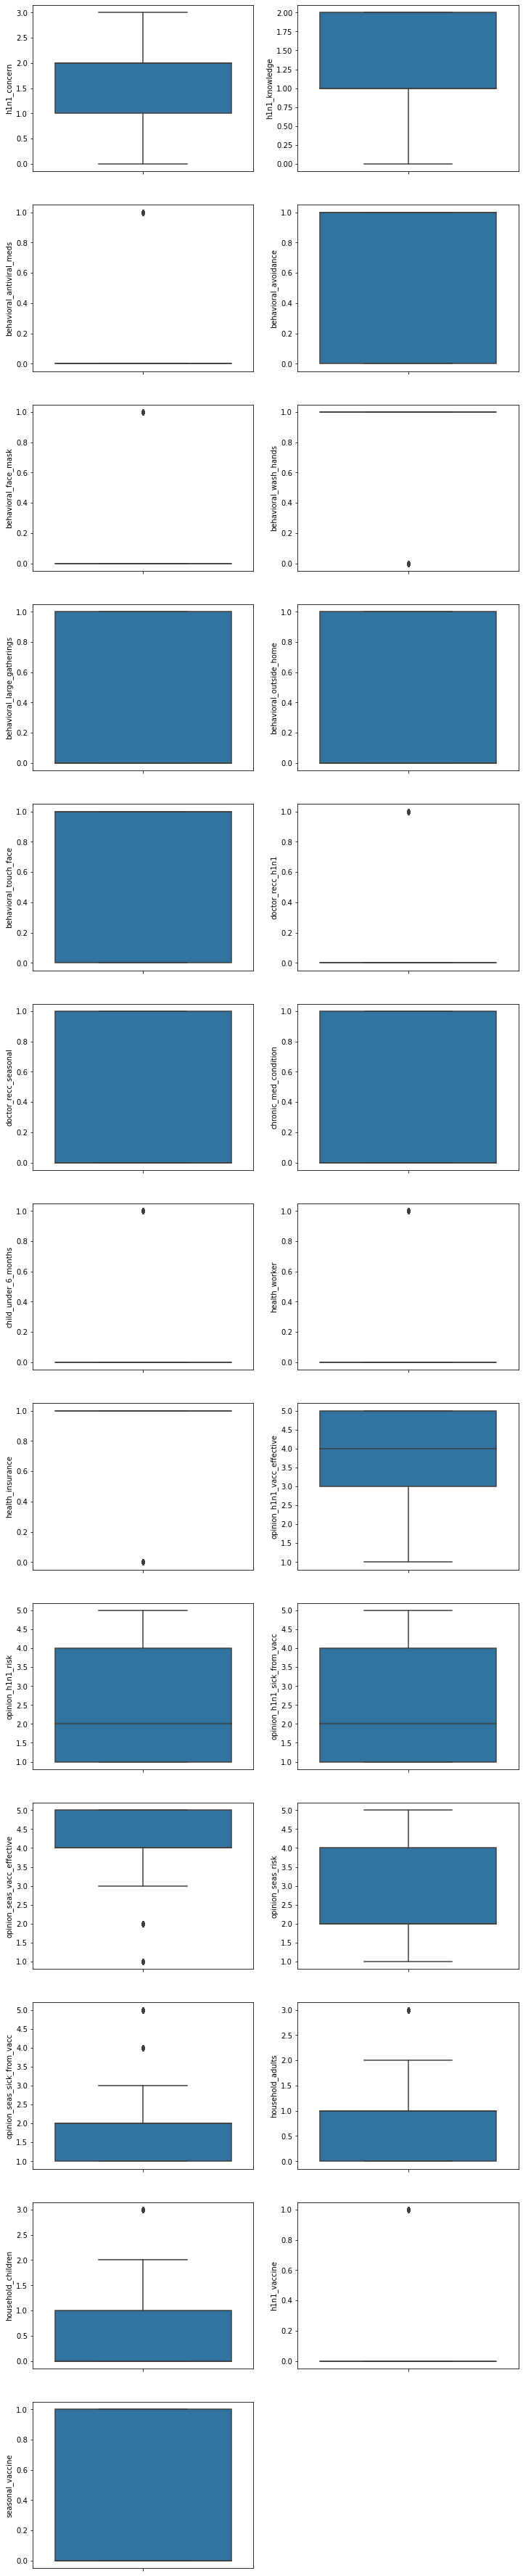

In [46]:
#calculate the number of fig to fit height 
grid=(numeric_df.shape[1]+1)//2 
#allocating each plot a height of 5
plt.figure(figsize=(12, grid * 5))

count=0
for col in numeric_df:
    count += 1 
    plt.subplot(grid,2,count)
    sns.boxplot(y=train_df[col]) 

In [47]:
for col in numeric_df:    
    q1= train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.90) #because of large amount of outliers

    # calculating iqr
    iqr = q3 - q1

    #defining lower and upper bound
    upper= q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    # removing outliers
    train_df= train_df[(train_df[col] >= lower) & (train_df[col] <= upper)]

### Saving Dataset

In [48]:
train_df.to_csv("train_clean.csv")

# Explanatory Analysis

## Univariate Analysis

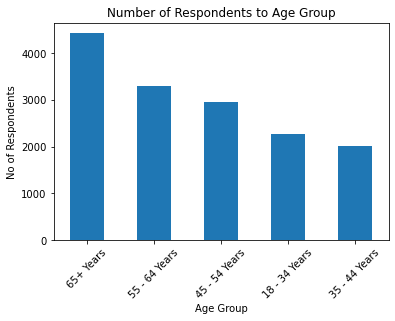

In [49]:
age_count =  train_df['age_group'].value_counts()
age_count.plot(kind="bar")
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.title("Number of Respondents to Age Group")
plt.show()

**65+ years** are the most respondents while **35-44 Years** are the least

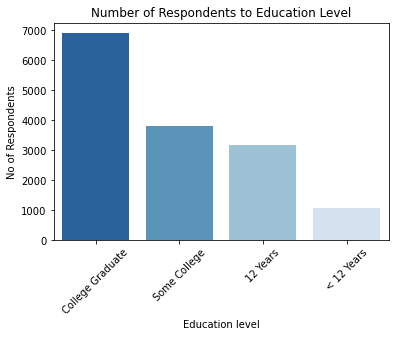

In [50]:
education_count =  train_df['education'].value_counts()
sns.countplot(x=train_df['education'],order=education_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('Education level')
plt.title("Number of Respondents to Education Level")
plt.show()

The survey had many **College Graduate** than other level.With the least be **<12 Years**

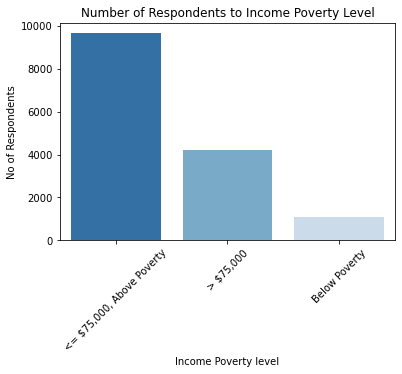

In [51]:
income_poverty_count =  train_df['income_poverty'].value_counts()
sns.countplot(x=train_df['income_poverty'],order=income_poverty_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('Income Poverty level')
plt.title("Number of Respondents to Income Poverty Level")
plt.show()

The survey had many **Above Poverty** respondents than other level.With the least be **Below Poverty**

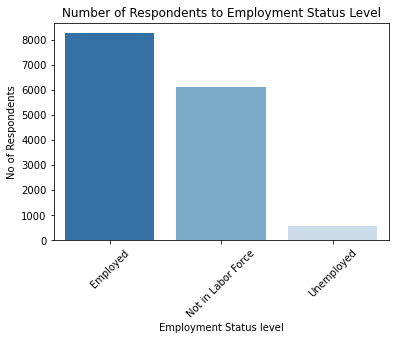

In [52]:
employment_status_count =  train_df['employment_status'].value_counts()
sns.countplot(x=train_df['employment_status'],order=employment_status_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('Employment Status level')
plt.title("Number of Respondents to Employment Status Level")
plt.show()

The survey had many **Employed** respondents than other level.With the least be **Unemployed**

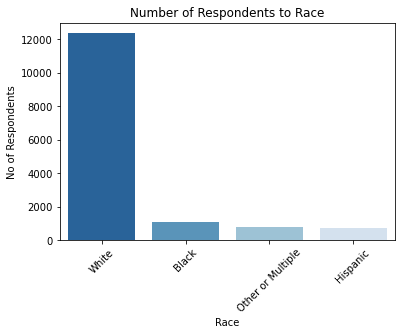

In [53]:
race_count =  train_df['race'].value_counts()
sns.countplot(x=train_df['race'],order=race_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('Race')
plt.title("Number of Respondents to Race")
plt.show()

The survey had many **White** respondents than other level.With the least be **Other or Multiple**

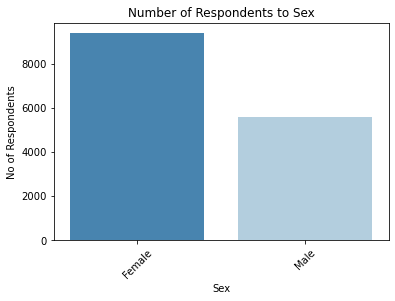

In [54]:
sex_count =  train_df['sex'].value_counts()
sns.countplot(x=train_df['sex'],order=sex_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('Sex')
plt.title("Number of Respondents to Sex")
plt.show()

The survey had many **Female** respondents.With the least be **Male**

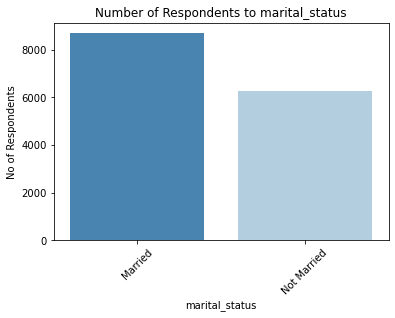

In [55]:
marital_status_count =  train_df['marital_status'].value_counts()
sns.countplot(x=train_df['marital_status'],order=marital_status_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('marital_status')
plt.title("Number of Respondents to marital_status")
plt.show()

The survey had many **Married** respondents than other level.With the least be **Not Married**

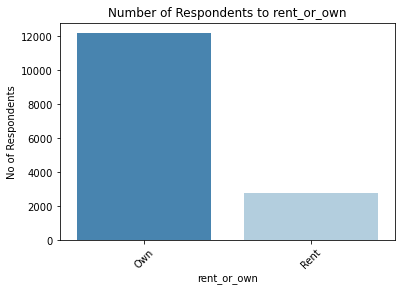

In [56]:
rent_or_own_count =  train_df['rent_or_own'].value_counts()
sns.countplot(x=train_df['rent_or_own'],order=rent_or_own_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('rent_or_own')
plt.title("Number of Respondents to rent_or_own")
plt.show()

The survey had many **Own** respondents than other level.With the least be **Rent**

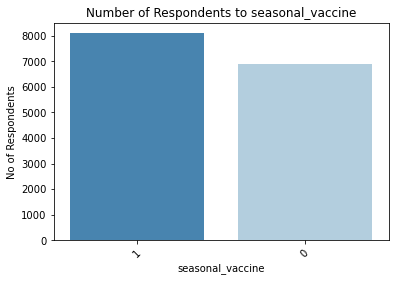

In [57]:
seasonal_vaccine_count =  train_df['seasonal_vaccine'].value_counts()
sns.countplot(x=train_df['seasonal_vaccine'],order=seasonal_vaccine_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('seasonal_vaccine')
plt.title("Number of Respondents to seasonal_vaccine")
plt.show()

The survey had many **not vaccinated** respondents for seasonal vaccine.With the least be **vaccinated**

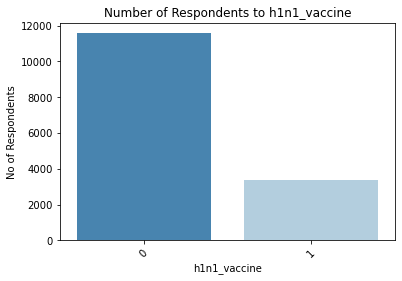

In [58]:
h1n1_vaccine_count =  train_df['h1n1_vaccine'].value_counts()
sns.countplot(x=train_df['h1n1_vaccine'],order=h1n1_vaccine_count.index,palette='Blues_r')
plt.ylabel('No of Respondents')
plt.xticks(rotation=45)
plt.xlabel('h1n1_vaccine')
plt.title("Number of Respondents to h1n1_vaccine")
plt.show()

The survey had many **not vaccinated** respondents for h1n1 vaccine.With the least be **vaccinated**

## Bivariate Analysis

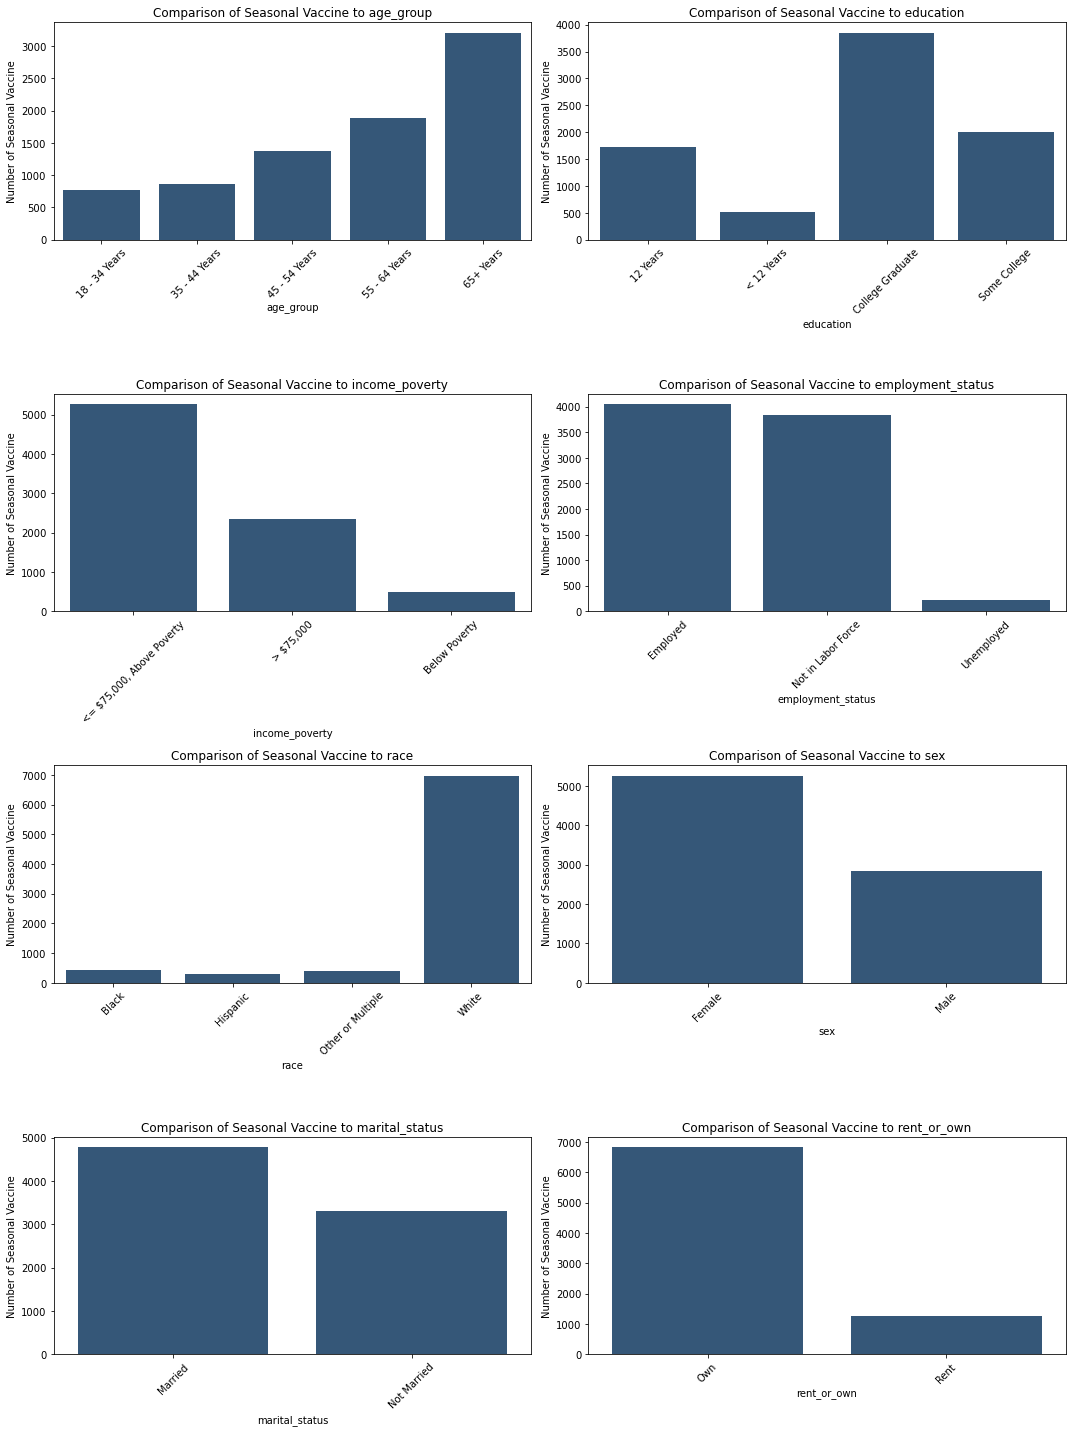

In [59]:
#columns to compare
col = ["age_group", "education", "income_poverty", "employment_status",
       "race", "sex", "marital_status", "rent_or_own"]
 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
 
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    # creating pivot table to aggregate the feature by seasonal_vaccine
    feature_seasonal_vaccine = train_df.pivot_table(index=feature, values='seasonal_vaccine', aggfunc='sum')
    
   
    sns.barplot(x=feature_seasonal_vaccine.index, 
                y=feature_seasonal_vaccine['seasonal_vaccine'], color='#2a5783', 
                ci=None, ax=axes[i])
     
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine')
    axes[i].set_title(f'Comparison of Seasonal Vaccine to {feature}')
    axes[i].tick_params(axis='x', rotation=45)  
    
plt.tight_layout()
plt.show()


1. Took most seasonal vaccines compared to other age groups.
- **65+ Years** 
- **College Graduate**
- **Female**
- **White**
- **Own House**
- **Married**
- **<=75000 Above Property**
2. Took least seasonal vaccines compared to other age groups.
- **35 - 44 Years** 
- **<12 Years** of education
- **Male**
- **Black,Hispanic and Other**
- **Rent House**
- **Not Married**
- **Below Property**

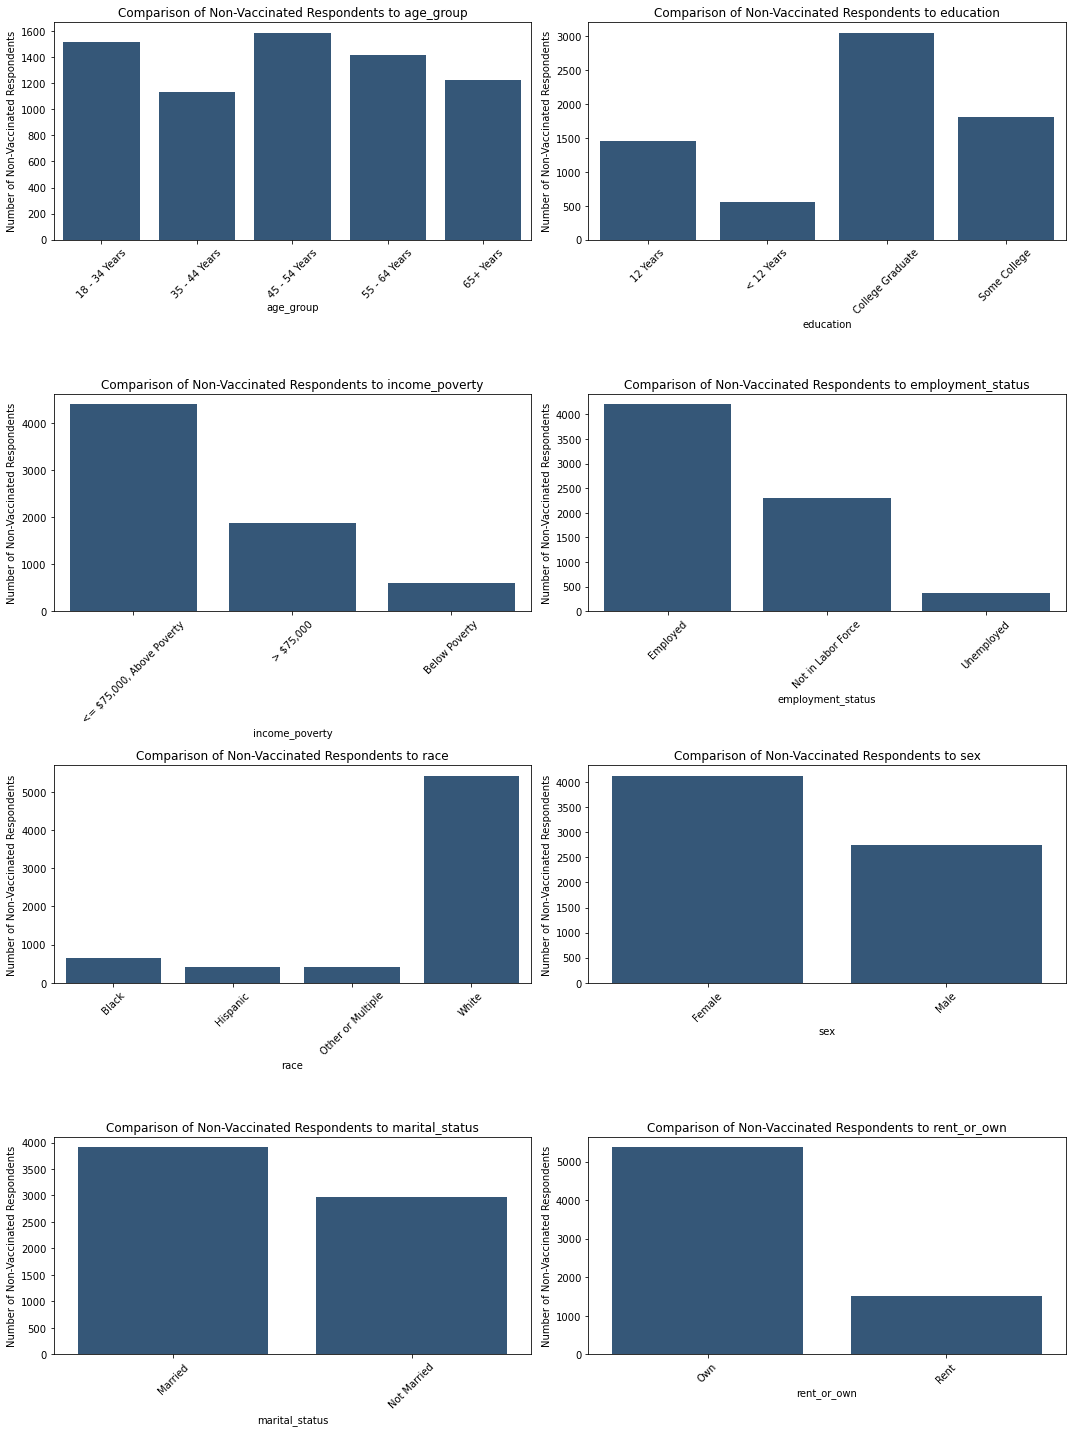

In [60]:
 # Create subplots, setting the number of rows and columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    # Filter the train_df to only include rows where seasonal_vaccine == 0
    feature_seasonal_vaccine_0 = train_df[train_df['seasonal_vaccine'] == 0]

    # Creating pivot table to aggregate the feature by seasonal_vaccine == 0
    feature_seasonal_vaccine = feature_seasonal_vaccine_0.pivot_table(index=feature, values='seasonal_vaccine', aggfunc='count')
    
    # Plotting data
    sns.barplot(x=feature_seasonal_vaccine.index, 
                y=feature_seasonal_vaccine['seasonal_vaccine'], color='#2a5783', 
                ci=None, ax=axes[i])
    
    # Set labels and titles for each plot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Non-Vaccinated Respondents')
    axes[i].set_title(f'Comparison of Non-Vaccinated Respondents to {feature}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

1. Most Non-vaccinated seasonal vaccines compared to other age groups.
- **18 - 24 Years** 
- **College Graduate**
- **Female**
- **White**
- **Employed**
- **Own House**
- **Married**
- **>=75000 Above Property** 

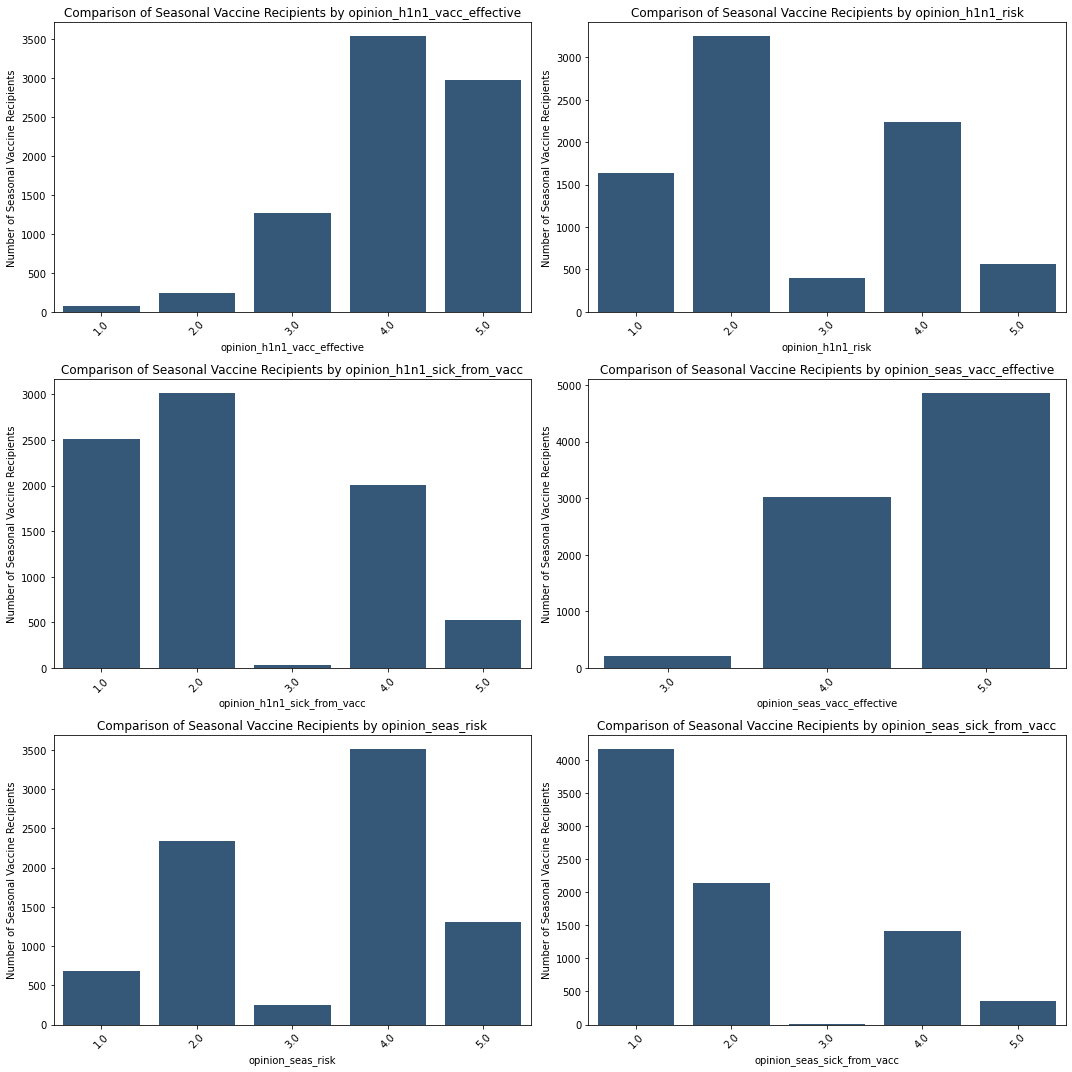

In [73]:
# Opinion-related columns to compare
col = ["opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc",
       "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Adjusted layout for 6 features
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    # Creating pivot table to aggregate the feature by seasonal_vaccine
    feature_seasonal_vaccine = train_df.pivot_table(index=feature, values='seasonal_vaccine', aggfunc='sum')

    sns.barplot(x=feature_seasonal_vaccine.index, 
                y=feature_seasonal_vaccine['seasonal_vaccine'], color='#2a5783', 
                ci=None, ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
    axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()


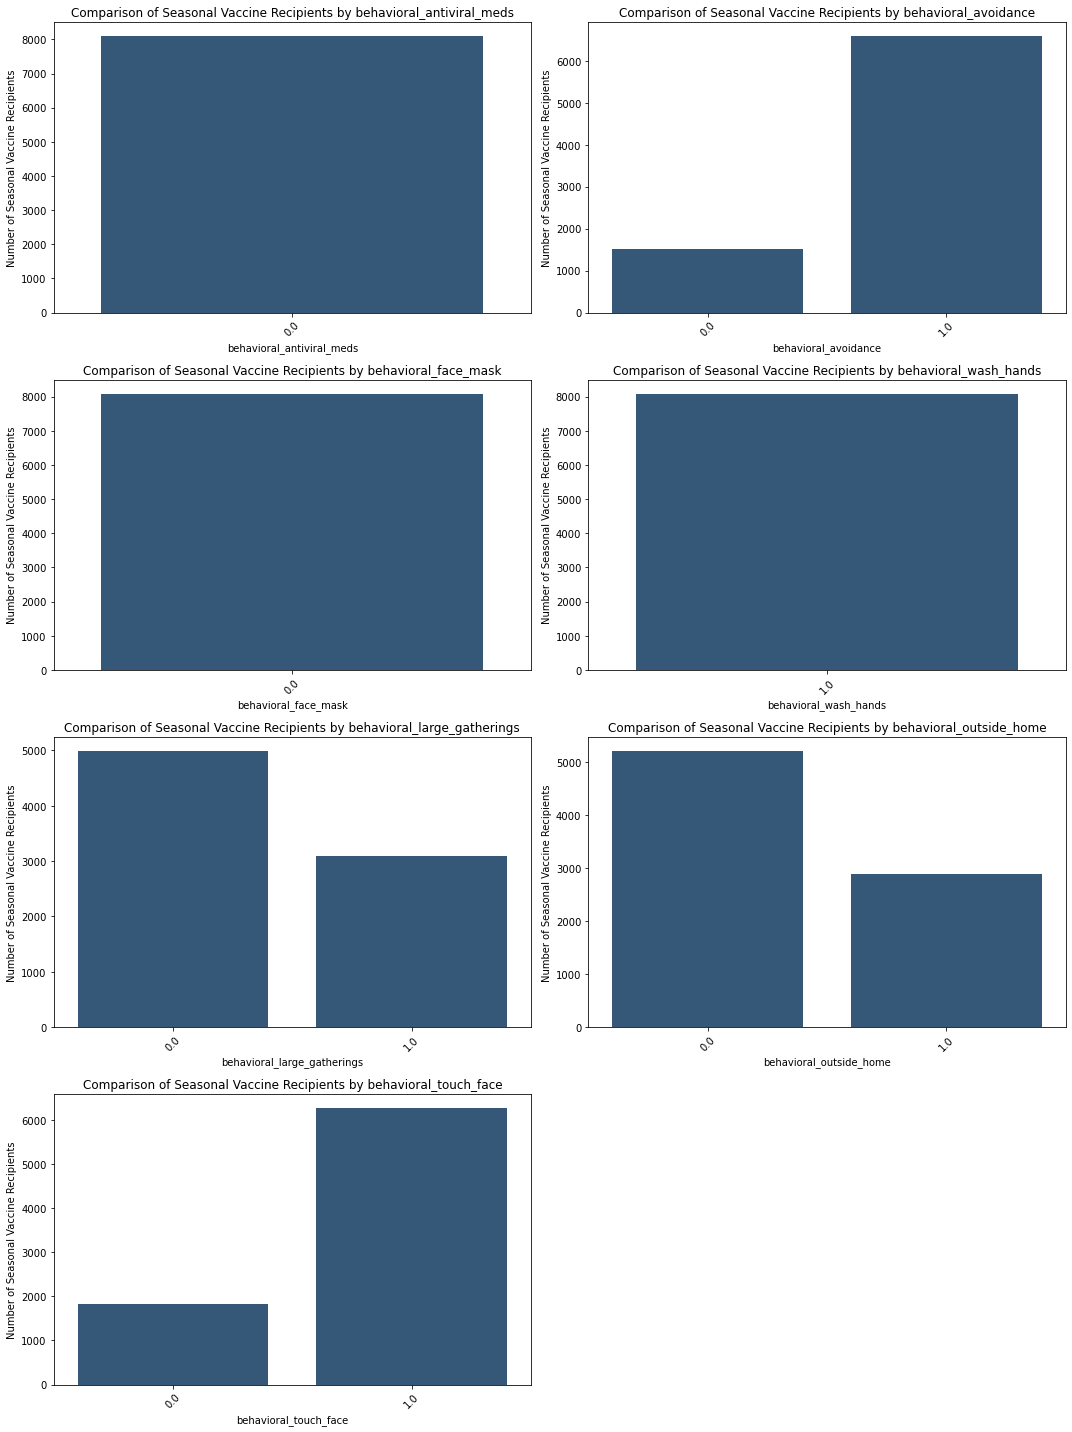

In [75]:
# Behavioral-related columns to compare
col = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask",
       "behavioral_wash_hands", "behavioral_large_gatherings", "behavioral_outside_home",
       "behavioral_touch_face"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  # Adjusted layout for 7 features
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    if i < len(col):  # Prevents index errors if we have fewer than 8 features
        # Creating pivot table to aggregate the feature by seasonal_vaccine
        feature_seasonal_vaccine = train_df.pivot_table(index=feature, values='seasonal_vaccine', aggfunc='sum')

        sns.barplot(x=feature_seasonal_vaccine.index, 
                    y=feature_seasonal_vaccine['seasonal_vaccine'], color='#2a5783', 
                    ci=None, ax=axes[i])

        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
        axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(col), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()


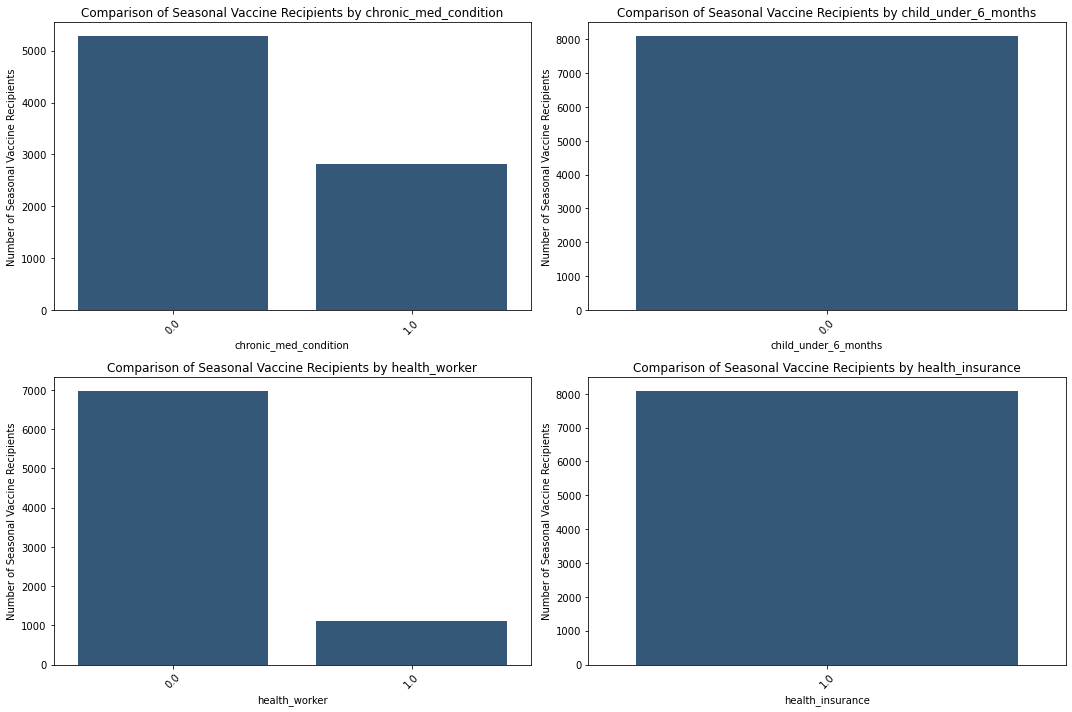

In [76]:
# Health-related columns
col = ["chronic_med_condition", "child_under_6_months", "health_worker", "health_insurance"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # 2x2 grid for 4 features
axes = axes.flatten()

for i, feature in enumerate(col):
    feature_seasonal_vaccine = train_df.pivot_table(index=feature, values='seasonal_vaccine', aggfunc='sum')

    sns.barplot(x=feature_seasonal_vaccine.index, 
                y=feature_seasonal_vaccine['seasonal_vaccine'], color='#2a5783', 
                ci=None, ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
    axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


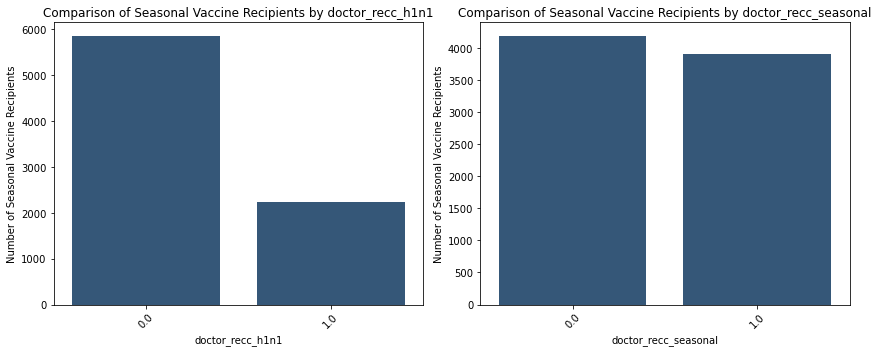

In [77]:
# Doctor recommendation columns
col = ["doctor_recc_h1n1", "doctor_recc_seasonal"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 row, 2 columns
axes = axes.flatten()

for i, feature in enumerate(col):
    feature_seasonal_vaccine = train_df.pivot_table(index=feature, values='seasonal_vaccine', aggfunc='sum')

    sns.barplot(x=feature_seasonal_vaccine.index, 
                y=feature_seasonal_vaccine['seasonal_vaccine'], color='#2a5783', 
                ci=None, ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
    axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


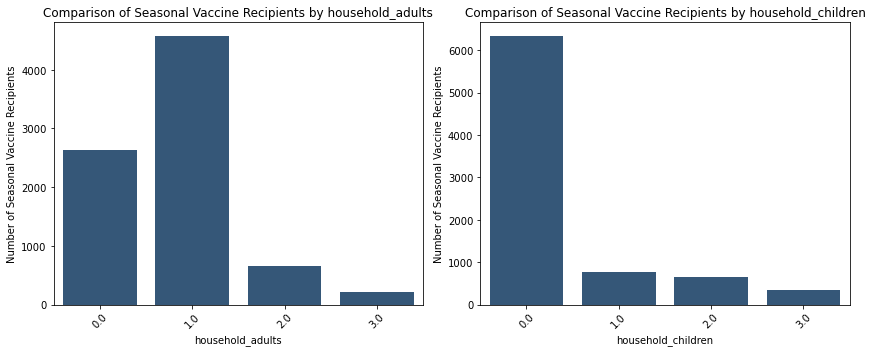

In [78]:
# Household-related columns
col = ["household_adults", "household_children"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 row, 2 columns
axes = axes.flatten()

for i, feature in enumerate(col):
    feature_seasonal_vaccine = train_df.pivot_table(index=feature, values='seasonal_vaccine', aggfunc='sum')

    sns.barplot(x=feature_seasonal_vaccine.index, 
                y=feature_seasonal_vaccine['seasonal_vaccine'], color='#2a5783', 
                ci=None, ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
    axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Multivariate Analysis

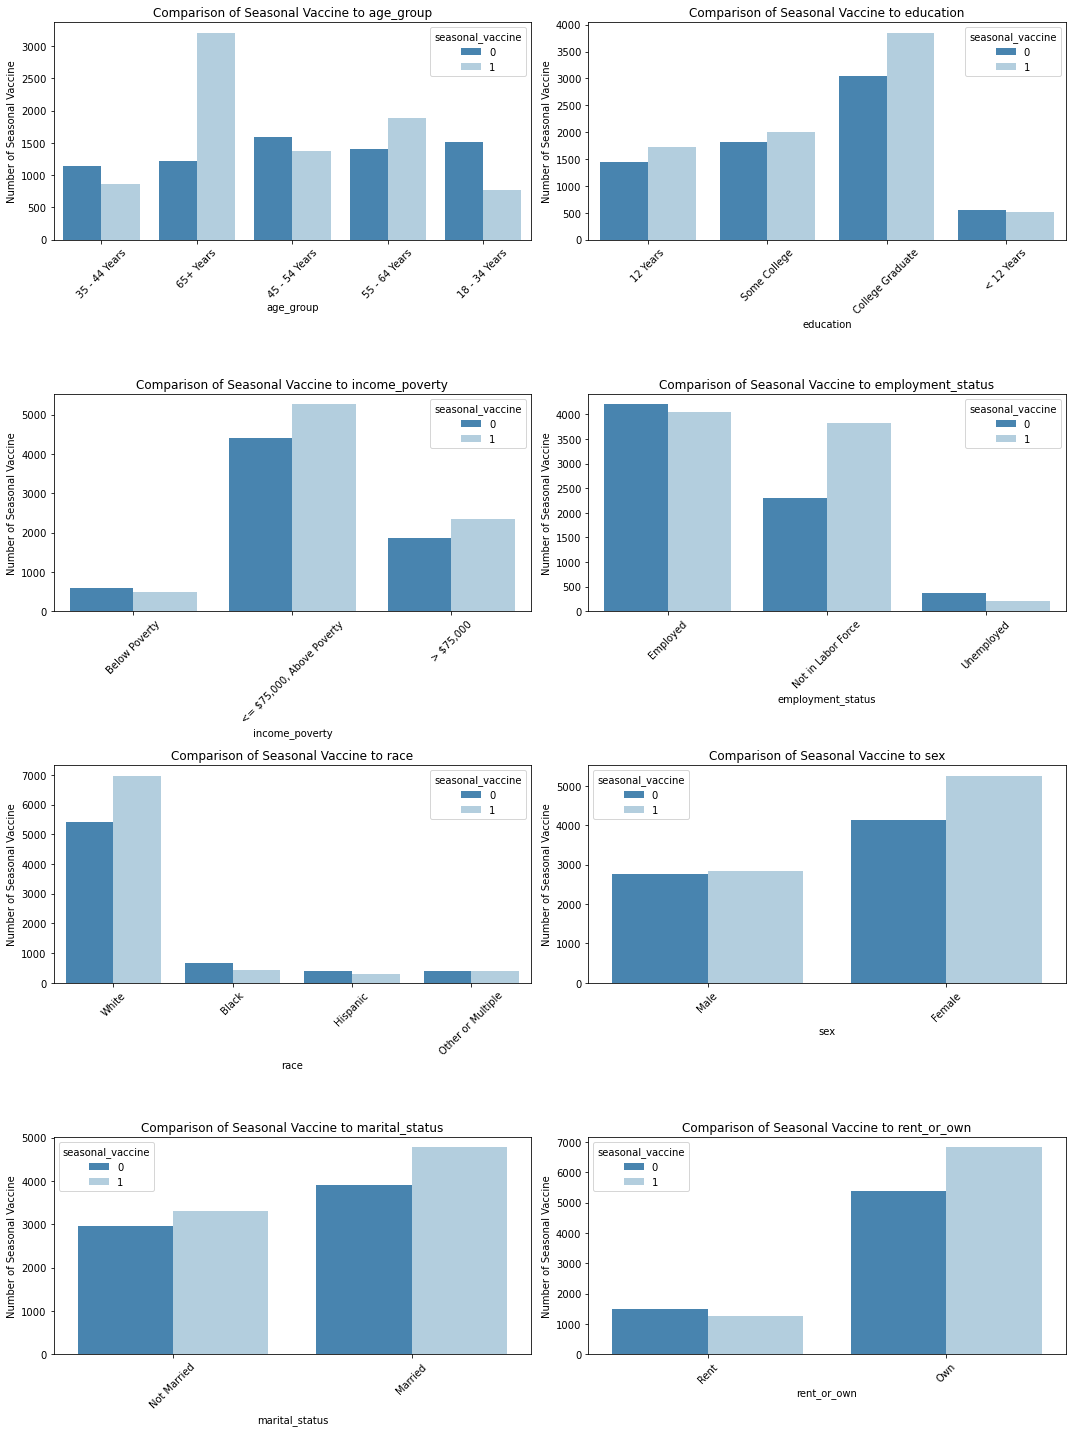

In [61]:
#columns to compare
col = ["age_group", "education", "income_poverty", "employment_status",
       "race", "sex", "marital_status", "rent_or_own"]
 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
 
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    # creating pivot table to aggregate the feature by seasonal_vaccine
   
    sns.countplot(x=train_df[feature],hue=train_df['seasonal_vaccine'],palette='Blues_r',
                  ax=axes[i])
     
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine')
    axes[i].set_title(f'Comparison of Seasonal Vaccine to {feature}')
    axes[i].tick_params(axis='x', rotation=45)  
    
plt.tight_layout()
plt.show()

1. All age groups except 65 Years and 55 - 64 Years which have more are vaccinated than non vaccinated.
2. All education level except College Graduate which have more are vaccinated than non vaccinated.
3. All income levels which have more are non-vaccinated than vaccinated.
4. All employment status except not in labor force which have more are vaccinated than non vaccinated.
5. All sex, marital status and rent status which have more are non-vaccinated than vaccinated.

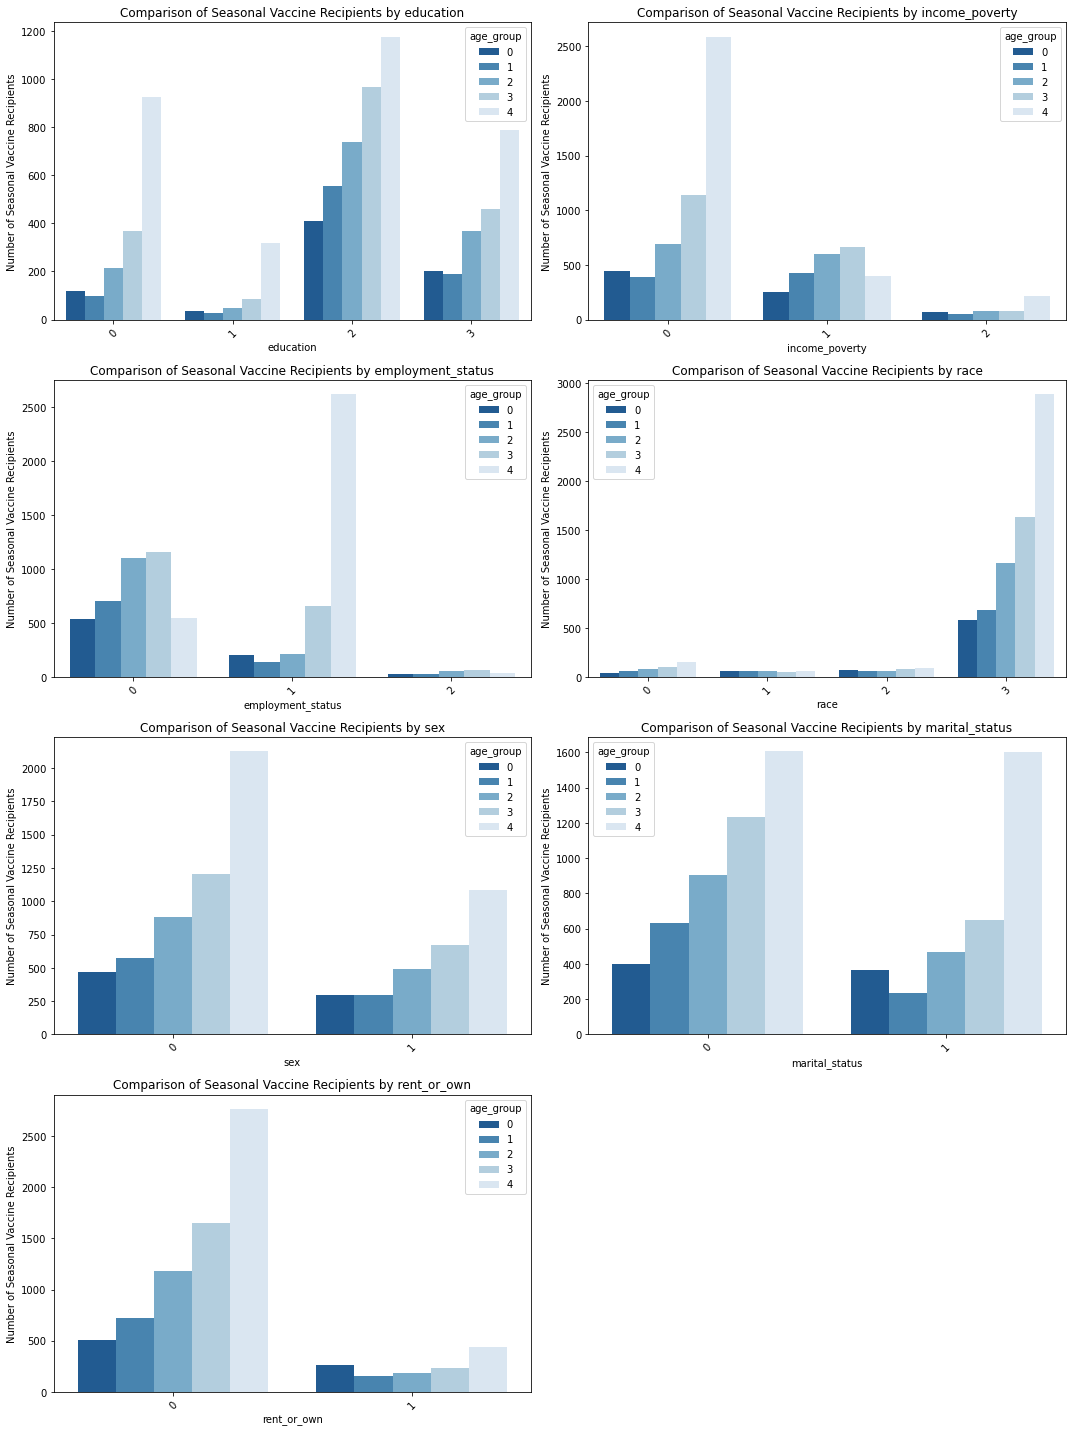

In [79]:
# Columns to compare
col = ["education", "income_poverty", "employment_status",
       "race", "sex", "marital_status", "rent_or_own"]

# Filter dataset where seasonal_vaccine was given
df_vaccinated = train_df[train_df['seasonal_vaccine'] == 1]

# Create subplots dynamically based on the number of features
n_cols = 2  # Number of columns in the subplot
n_rows = (len(col) + n_cols - 1) // n_cols  # Calculate required rows dynamically

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    sns.countplot(x=df_vaccinated[feature], hue=df_vaccinated['age_group'], 
                  palette='Blues_r', ax=axes[i])
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
    axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(len(col), len(axes)):  
    fig.delaxes(axes[j])  

# Adjust layout and display
plt.tight_layout()
plt.show()


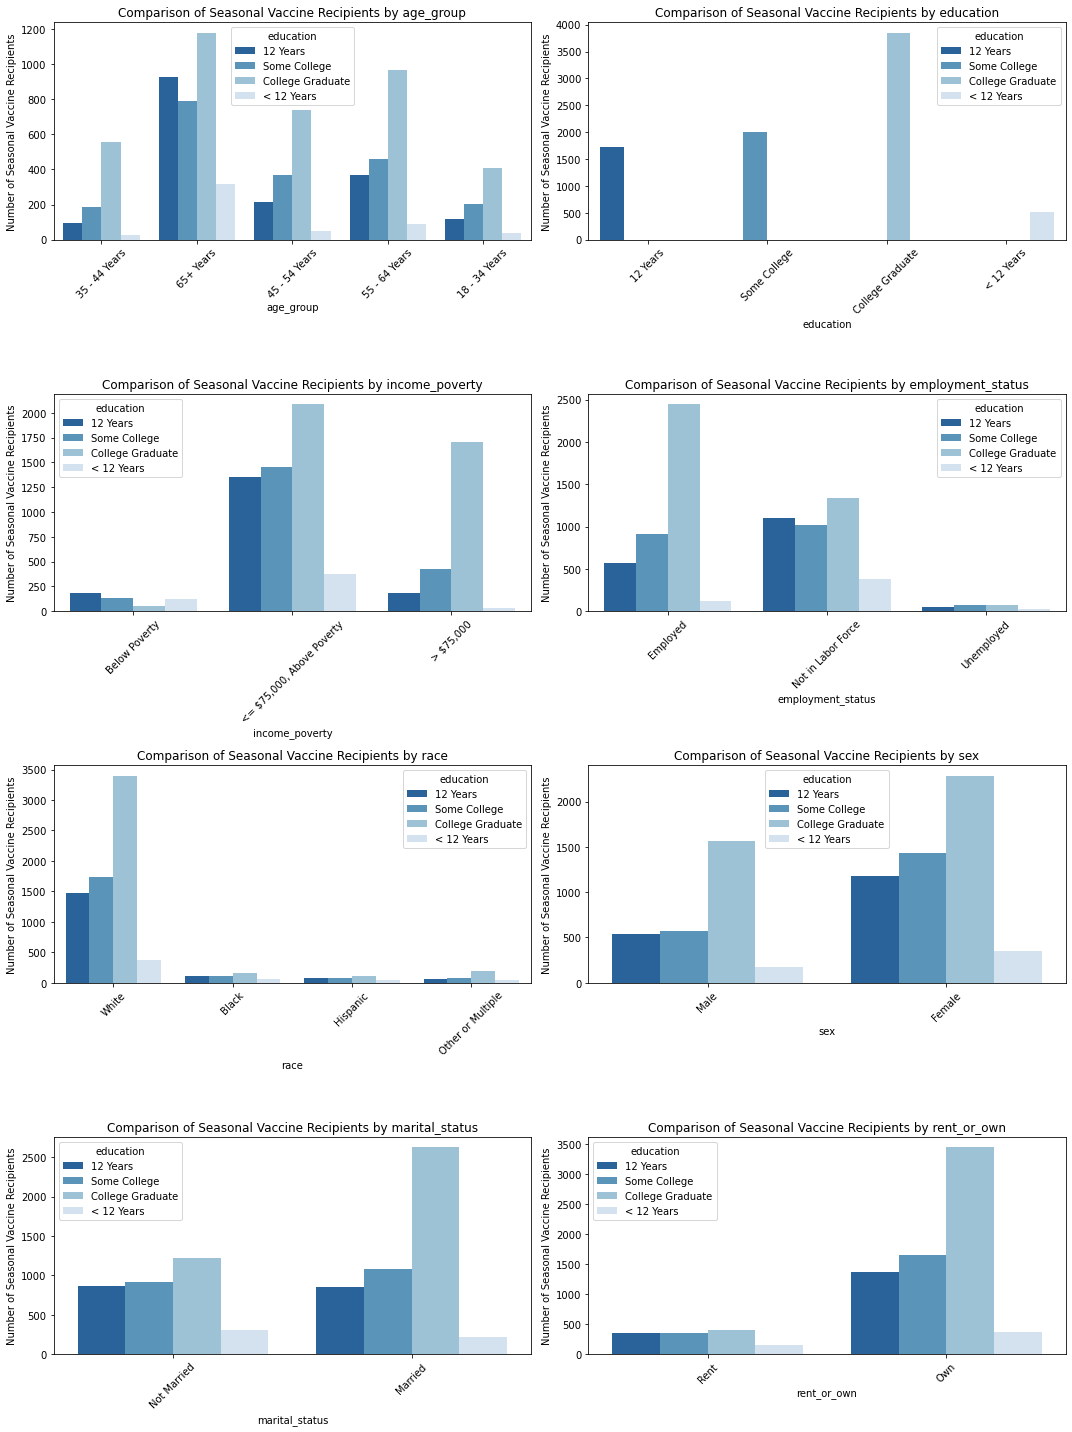

In [63]:
# Columns to compare
col = ["age_group","education", "income_poverty", "employment_status",
       "race", "sex", "marital_status", "rent_or_own"]

# Filter dataset where seasonal_vaccine was given
df_vaccinated = train_df[train_df['seasonal_vaccine'] == 1]

# Create subplots dynamically based on the number of features
n_cols = 2  # Number of columns in the subplot
n_rows = (len(col) + n_cols - 1) // n_cols  # Calculate required rows dynamically

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    sns.countplot(x=df_vaccinated[feature], hue=df_vaccinated["education"], 
                  palette='Blues_r', ax=axes[i])
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
    axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(len(col), len(axes)):  
    fig.delaxes(axes[j])  

# Adjust layout and display
plt.tight_layout()
plt.show()


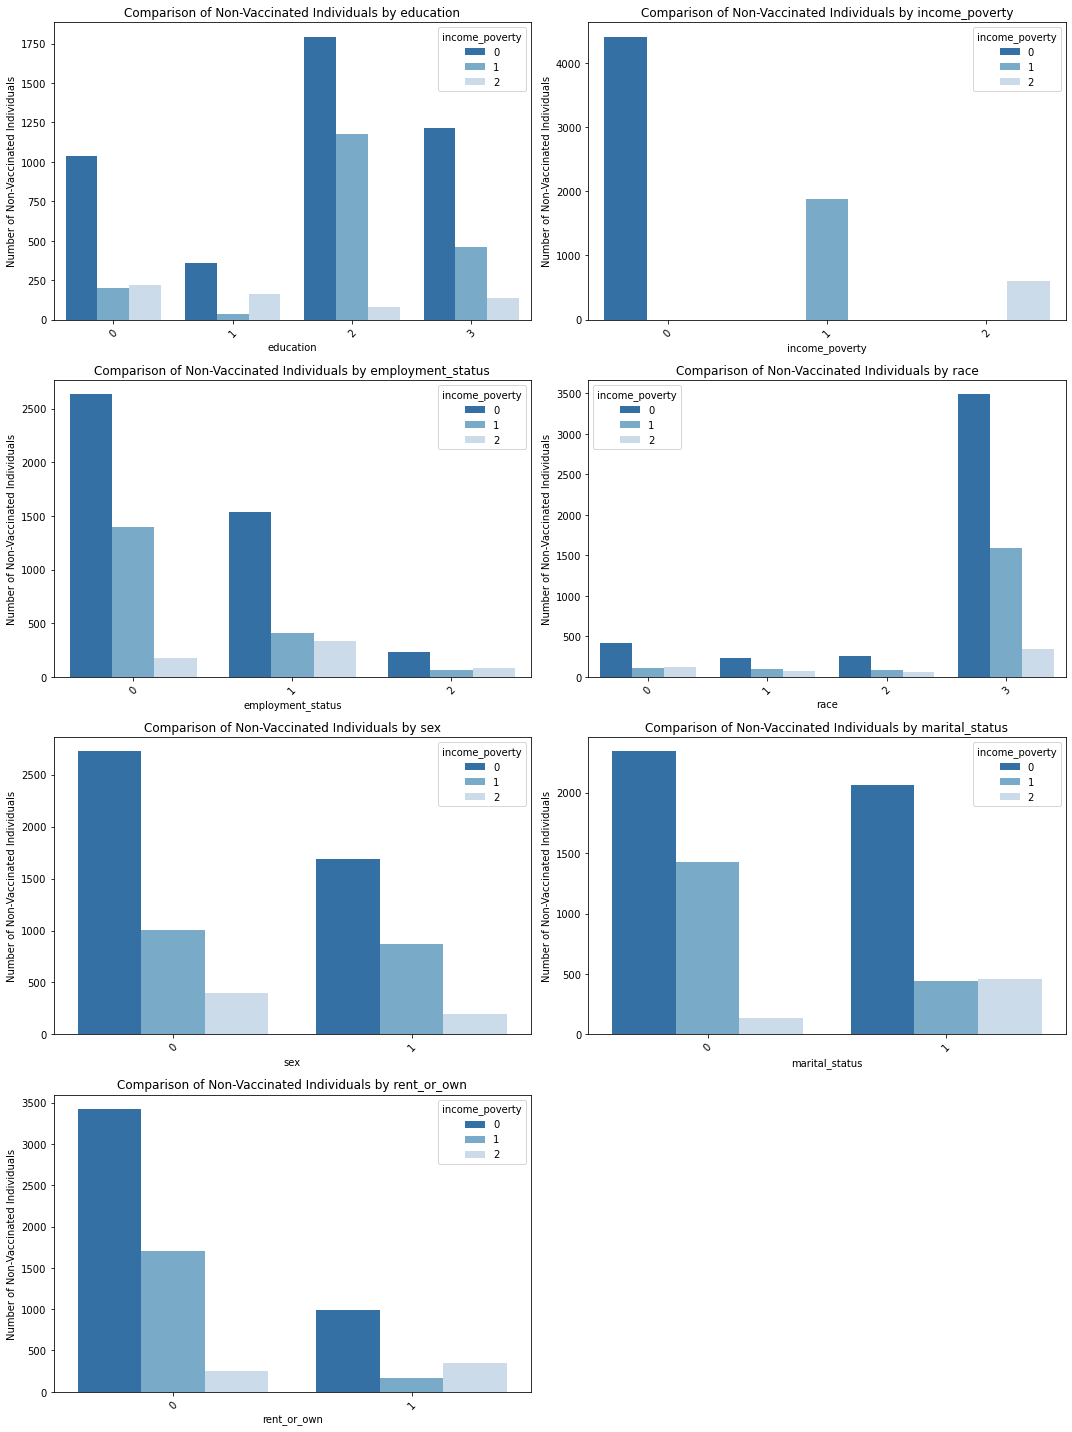

In [81]:
# Filter dataset where seasonal_vaccine was NOT given (non-vaccinated)
df_non_vaccinated = train_df[train_df['seasonal_vaccine'] == 0]

# Create subplots dynamically based on the number of features
n_cols = 2  # Number of columns in the subplot
n_rows = (len(col) + n_cols - 1) // n_cols  # Calculate required rows dynamically

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    sns.countplot(x=df_non_vaccinated[feature], hue=df_non_vaccinated["income_poverty"], 
                  palette='Blues_r', ax=axes[i])
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Non-Vaccinated Individuals')
    axes[i].set_title(f'Comparison of Non-Vaccinated Individuals by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(len(col), len(axes)):  
    fig.delaxes(axes[j])  

# Adjust layout and display
plt.tight_layout()
plt.show()

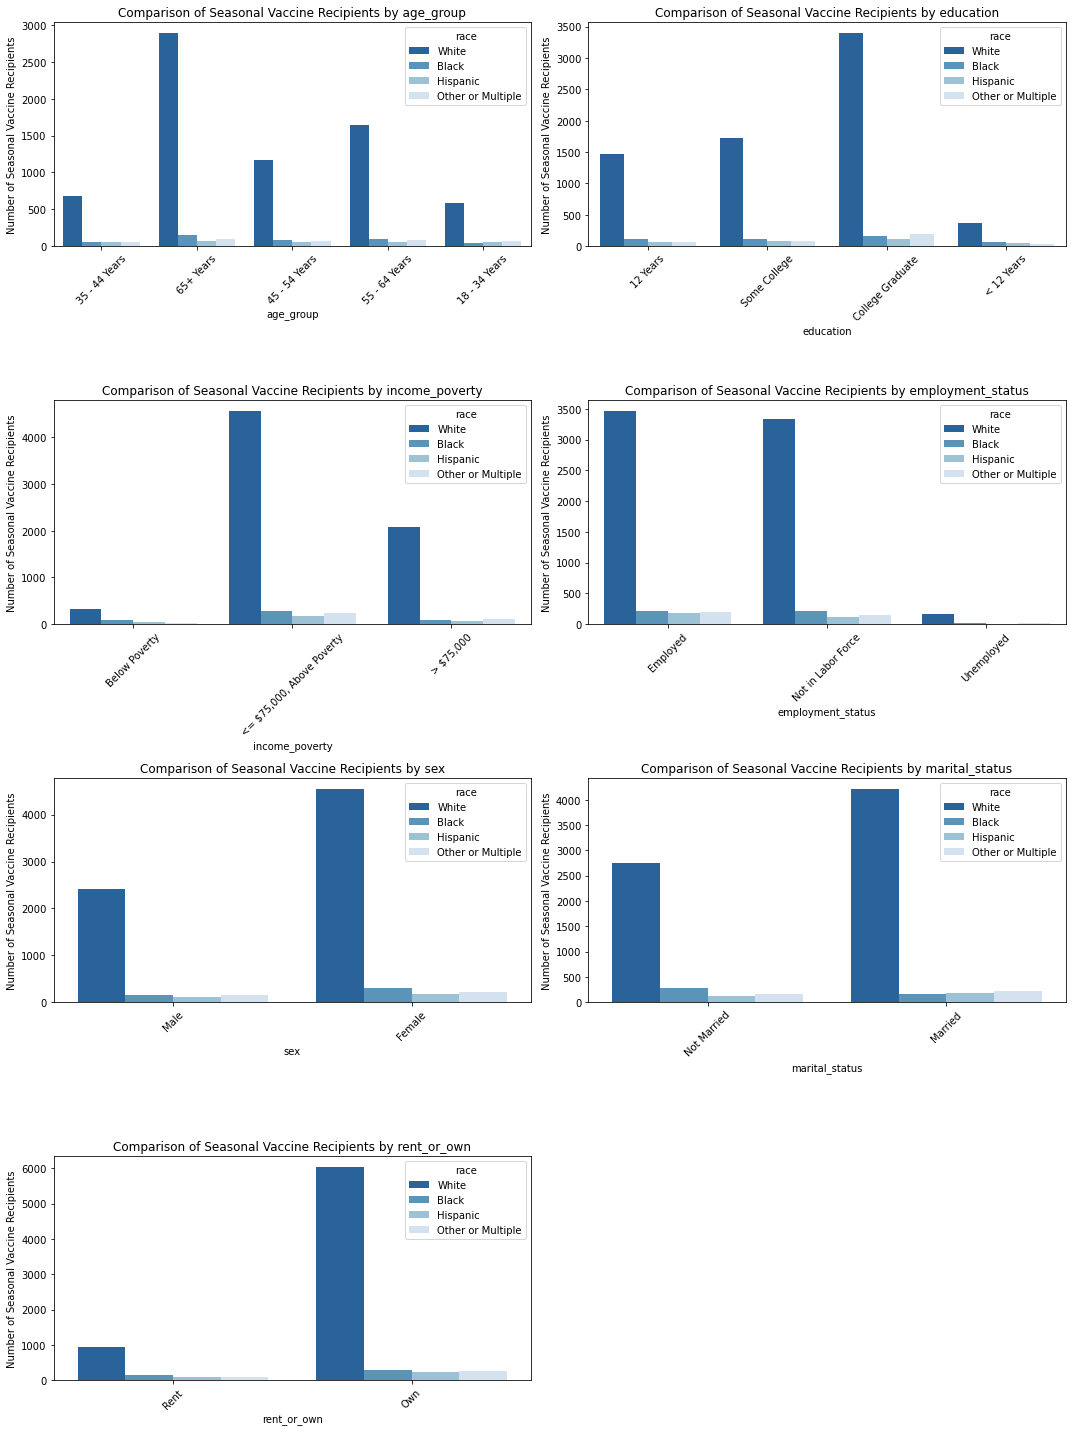

In [64]:
# Columns to compare
col = ["age_group","education", "income_poverty", "employment_status",
        "sex", "marital_status", "rent_or_own"]

# Filter dataset where seasonal_vaccine was given
df_vaccinated = train_df[train_df['seasonal_vaccine'] == 1]

# Create subplots dynamically based on the number of features
n_cols = 2  # Number of columns in the subplot
n_rows = (len(col) + n_cols - 1) // n_cols  # Calculate required rows dynamically

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through each column in the list
for i, feature in enumerate(col):
    sns.countplot(x=df_vaccinated[feature], hue=df_vaccinated["race"], 
                  palette='Blues_r', ax=axes[i])
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Seasonal Vaccine Recipients')
    axes[i].set_title(f'Comparison of Seasonal Vaccine Recipients by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(len(col), len(axes)):  
    fig.delaxes(axes[j])  

# Adjust layout and display
plt.tight_layout()
plt.show()


# Preprocessing

In [65]:
train_df.isna().sum()

age_group                      0
education                      0
income_poverty                 0
employment_status              0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_

In [66]:
# columns to encode
categorical_columns = ["age_group", "education", "income_poverty", "employment_status",
                       "race", "sex", "marital_status", "rent_or_own"]

label_encoders = {}

# encoding to each categorical column
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(train_df[col])
    train_df[col] = encoder.transform(train_df[col]) 
    label_encoders[col] = encoder 

train_df.head()


,age_group,education,income_poverty,employment_status,race,sex,marital_status,rent_or_own,h1n1_concern,h1n1_knowledge,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
1,1,0,2,0,3,1,1,1,3.0,2.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
3,4,0,2,1,3,0,1,1,1.0,1.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2,3,0,0,3,0,0,0,2.0,1.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0
5,4,0,0,0,3,1,0,0,3.0,1.0,...,5.0,2.0,1.0,5.0,4.0,4.0,2.0,3.0,0,0
7,2,3,0,0,3,0,0,0,1.0,0.0,...,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,1,1


In [67]:
train_labels_df.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


# Modeling

In [68]:
# train logreg model   
logreg = LogisticRegression()
X = train_df.drop(columns=["seasonal_vaccine","h1n1_vaccine"])
y = train_df.seasonal_vaccine
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.8, random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression()

In [69]:
# train dt model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
# train rf model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# train svc model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

# Evaluation

In [72]:
# logreg model
y_predict = logreg.predict(X_test)
# evaluate the logreg model
logreg_accuracy = accuracy_score(y_test,y_predict)

# dt model
y_pred = dt_model.predict(X_test)
# Evaluate the dt model
dt_model_accuracy = accuracy_score(y_test, y_pred) 

#rf model
y_pred = rf_model.predict(X_test)
# evaluate the rf model
rf_model_accuracy = accuracy_score(y_test, y_pred)

# svm model
y_pred = svm_model.predict(X_test)
# evaluate the svm model
svm_model_accuracy = accuracy_score(y_test, y_pred)



print("Logistic Regression Accuracy = ", logreg_accuracy ) 
print("Decision Tree Classifier Accuracy = ", dt_model_accuracy)
print("Random Forest Accuracy = ",  rf_model_accuracy)
print("SVM Accuracy = ", svm_model_accuracy)

Logistic Regression Accuracy =  0.7582059634176898
Decision Tree Classifier Accuracy =  0.6539714357303934
Random Forest Accuracy =  0.7528606030234695
SVM Accuracy =  0.7574542721122526


# Conclusion